# Data Project 3

# Summary

The purpose of our project is to investigate and predict the outcome of the 2024 presidential election in Virginia using ACS 5-year data from 2008-2020 and provide insights into the precision/accuracy of our prediction. The data given to us is composed of voting data for Virginia from 2000 to 2020 (voting_VA.csv), county-level summary statistics (nhgis_county_data), and county adjacencies and populations (county_adjacencies.csv).  We chose to focus on three variables: sex by age, race, and ratio of income to poverty level over the time span of 2008 to 2020 as our predictive factors. We employed a random forest model, alongside exploratory data analysis tools such as scatterplots, residual plots, and feature importance plots to study how these variables influence electoral outcomes. Notably, in the feature importance plot, variables, all from the 2008-2012 dataset, such as the under .50 level for ratio of income to poverty level, females of 20 years old, and African American race were among the most significant features. Our model achieved an R-square value of approximately 0.447, indicating moderate prediction accuracy. Analysis of the map generated by the model revealed Republican dominance in large areas, while Democratic strongholds were concentrated in specific districts. Swing areas were identified as crucial in determining the final outcome. However, limitations such as model accuracy, non-response bias, the variability of poverty thresholds, and evolving political views highlight areas for improvement. Future enhancements could involve data about past candidates that could be studied for county-candidate interactions which could be useful in the case of a Biden-Trump rematch. Additionally, we could incorporate additional variables and broaden data collection methods to capture more nuanced voter behavior and preferences and draw from sources outside Virginia to leverage the limited observations per county to ultimately refine prediction accuracy and provide deeper insights into electoral dynamics.

# Data

The American Community Survey (ACS) is an integral component of the U.S. Census Bureau's Decennial Census Program, providing up-to-date demographic, socio-economic, and housing data throughout the decade. The ACS covers a comprehensive range of over 40 topics, encompassing education, language proficiency, immigration status, marital status, and migration patterns.

Each year, the ACS collects data through a random sample of approximately 3.5 million addresses across the country. It produces statistics for varying time periods, including 1-year, 3-year, and 5-year estimates, catering to the diverse needs of policymakers, researchers, and communities. In particular, the availability of 5-year estimates provide a robust dataset for our data analysis. These estimates cover a wide array of geographic areas across the entire country at different levels of specificity. This granularity enables researchers to delve into localized trends and patterns, facilitating nuanced analyses and informed decision-making across a range of fields.

For our project, we tried to predict the 2024 presidential outcome in Virginia using three key variables—sex by age, race, and ratio of income to poverty level—derived from the American Community Survey (ACS) 5-Year Data spanning 2008 to 2020. We used the data from the American Community Survey: 5-Year Data from the year ranges 2008-2012, 2012-2016, and 2016-2020, so that this way we had data to analyze from 4 different presidential election years. To analyze our data, we created and used a random forest model, created a scatterplot and residual plot, and a feature importance plot.

## Data Cleaning / Analysis Preparation

One of the challenges that we faced was cleaning the data to ensure consistency and compatibility across different ACS datasets (2008-2012, 2012-2016, and 2016-2020). This was crucial for meaningful analysis in our project, especially because there was such a large amount of data to work with, we needed to make sure that we properly narrowed down our scope and cleaned our data properly. Aggregating data at appropriate levels (e.g., state-level, county-level) is essential for conducting relevant analysis. Choosing the right level of aggregation ensures that the analysis captures meaningful variations and trends within the Virginia population and we wanted to look at county-level data to explore the deepest level of granularity that was possible. To start the process, we needed to solve the problem of cleaning the data we had from three separate files (for the different datasets), selecting the relevant data, and combining this data together correctly into one location. Since the data we had was from the same survey, just collected from different years, we had less trouble with combining these into a single table. Firstly, we had to look at the codebook in order to select the names of the relevant columns we needed for our data analysis. Next we had to parse through the three .csv files independently and put them into a list to concatenate them together into one single data frame. From then, we iteratively merged the data together into one big data frame from each year starting at 2020 and working in descending order. The only missing values we had were from the geographical data, which had 936 missing values. However, those do not actually affect our model and were only used for visualization.

## Relevant Variables

- **Sex by Age**: This metric provides information on the total population distribution based on sex and age groups. It helps in understanding demographic trends and voting behaviors across different age cohorts and genders. The age range spans from under five years old to 85 and over for both females and males.

- **Race**: Race data offers insights into the racial composition of the total population, which is crucial for understanding voting patterns and political preferences. It allows for analysis of voting behavior among different racial groups and their impact on election outcomes. The variable was split into categories of: White, Black, American Indian/Alaskan Native, Asian, Native Hawaiian/Other Pacific Islander, Some other race alone, two or more races with distinctions of including or excluding Some other race, and three or more races.

- **Ratio of Income to Poverty Level**: This variable measures the economic well-being of individuals or households by comparing their income to the poverty threshold which can help in analyzing socioeconomic disparities and their influence on electoral outcomes. Poverty status is determined by income and family size. This data was taken from the population for whom poverty status is determined. The range of ratio values are divided into six levels: under .50, .50 to .99, 1.00 to 1.24, 1.25 to 1.49, 1.50 to 1.84, 1.85 to 1.99, and 2.00 and over. A ratio less than 1 means that the income is less than the poverty level. When the ratio equals 1, the income and poverty level are the same, and when the ratio is greater than 1, the income is higher than the poverty level. For example, a value of .5 means that the person’s income is below 50% of poverty.

# Results: Random Forest Model

Creating a target variable for the model:

In [1]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# read in cleaned data csv
df = pd.read_csv("./data/full_va_dataset.csv")

In [ ]:
#calculating vote differences
df['vote_diff_2020'] = df['rep_votes_2020'] - df['dem_votes_2020']
df['vote_diff_2016'] = df['rep_votes_2016'] - df['dem_votes_2016']
df['vote_diff_2012'] = df['rep_votes_2012'] - df['dem_votes_2012']

#applying the inverse hyperbolic sine transformation
df['vote_diff_ihs_2020'] = np.arcsinh(df['vote_diff_2020'])
df['vote_diff_ihs_2016'] = np.arcsinh(df['vote_diff_2016'])
df['vote_diff_ihs_2012'] = np.arcsinh(df['vote_diff_2012'])

#calculating the average IHS transformed vote difference
df['avg_vote_diff_ihs'] = df[['vote_diff_ihs_2020', 'vote_diff_ihs_2016', 'vote_diff_ihs_2012']].mean(axis=1)
print(df[['vote_diff_2020', 'vote_diff_ihs_2020',
          'vote_diff_2016', 'vote_diff_ihs_2016',
          'vote_diff_2012', 'vote_diff_ihs_2012',
          'avg_vote_diff_ihs']].describe())

       vote_diff_2020  vote_diff_ihs_2020  vote_diff_2016  vote_diff_ihs_2016  \
count      133.000000          133.000000      133.000000          133.000000   
mean     -3392.015038            2.534647    -1594.210526            3.412792   
std      27040.291611            8.698192    21546.687172            8.249139   
min    -251542.000000          -13.128512  -197423.000000          -12.886251   
25%      -1286.000000           -7.852439     -569.000000           -7.037028   
50%       1233.000000            7.810353     1610.000000            8.077137   
75%       5010.000000            9.212338     4686.000000            9.145482   
max      23424.000000           10.754664    20891.000000           10.640221   

       vote_diff_2012  vote_diff_ihs_2012  avg_vote_diff_ihs  
count      133.000000          133.000000         133.000000  
mean     -1124.812030            2.493952           2.813797  
std      14012.807236            8.240829           8.074330  
min    -108500.000

In [ ]:
print(df.columns.tolist())

['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT', 'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area', 'geometry', 'FIPS_left', 'County', 'Population2022', 'FIPS', 'District', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12', 'QSEE001', 'QSEE002', 'QSEE003', 'QSEE004', 'QSEE005', 'QSEE006', 'QSEE007', 'QSEE008', 'QSEE009', 'QSEE010', 'QSEE011', 'QSEE012', 'QSEE013', 'QSEE014', 'QSEE015', 'QSEE016', 'QSEE017', 'QSEE018', 'QSEE019', 'QSEE020', 'QSEE021', 'QSEE022', 'QSEE023', 'QSEE024', 'QSEE025', 'QSEE026', 'QSEE027', 'QSEE028', 'QSEE029', 'QSEE030', 'QSEE031', 'QSEE032', 'QSEE033', 'QSEE034', 'QSEE035', 'QSEE036', 'QSEE037', 'QSEE038', 'QSEE039', 'QSEE040', 'QSEE041', 'QSEE042', 'QSEE043', 'QSEE044', 'QSEE045', 'QSEE046', 'QSEE047', 'QSEE048', 'QSEE049', 'QSQE001', 'QSQE002', 'QSQE003', 'QSQE004', 'QSQE005', 'QSQE006', 'QSQE007', 'QSQE008', 'QSQE009', 'QSQE010', 'QUVE001', 'QUVE002', 'QUVE003', 'QUVE004', 'QUVE005', 'QUVE006', 'QUVE007

Splitting dataframe into geography and model:

In [ ]:
#variables to help visualize the data after
geo_df = df[['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT', 'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area', 'geometry', 'FIPS_left', 'County', 'Population2022', 'FIPS', 'District', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11', 'N12']]

#variables for the model (kept FIPS to remerge the dataframes but will drop it from features)
model_columns = [
    "QSEE001", "QSEE002", "QSEE003", "QSEE004", "QSEE005", "QSEE006", "QSEE007", "QSEE008", "QSEE009", "QSEE010", "QSEE011", "QSEE012", "QSEE013", "QSEE014", "QSEE015", "QSEE016", "QSEE017", "QSEE018", "QSEE019", "QSEE020", "QSEE021", "QSEE022", "QSEE023", "QSEE024", "QSEE025", "QSEE026", "QSEE027", "QSEE028", "QSEE029", "QSEE030", "QSEE031", "QSEE032", "QSEE033", "QSEE034", "QSEE035", "QSEE036", "QSEE037", "QSEE038", "QSEE039", "QSEE040", "QSEE041", "QSEE042", "QSEE043", "QSEE044", "QSEE045", "QSEE046", "QSEE047", "QSEE048", "QSEE049",
    "QSQE001", "QSQE002", "QSQE003", "QSQE004", "QSQE005", "QSQE006", "QSQE007", "QSQE008", "QSQE009", "QSQE010",
    "QUVE001", "QUVE002", "QUVE003", "QUVE004", "QUVE005", "QUVE006", "QUVE007", "QUVE008",
    "AF2AE001", "AF2AE002", "AF2AE003", "AF2AE004", "AF2AE005", "AF2AE006", "AF2AE007", "AF2AE008", "AF2AE009", "AF2AE010", "AF2AE011", "AF2AE012", "AF2AE013", "AF2AE014", "AF2AE015", "AF2AE016", "AF2AE017", "AF2AE018", "AF2AE019", "AF2AE020", "AF2AE021", "AF2AE022", "AF2AE023", "AF2AE024", "AF2AE025", "AF2AE026", "AF2AE027", "AF2AE028", "AF2AE029", "AF2AE030", "AF2AE031", "AF2AE032", "AF2AE033", "AF2AE034", "AF2AE035", "AF2AE036", "AF2AE037", "AF2AE038", "AF2AE039", "AF2AE040", "AF2AE041", "AF2AE042", "AF2AE043", "AF2AE044", "AF2AE045", "AF2AE046", "AF2AE047", "AF2AE048", "AF2AE049",
    "AF2ME001", "AF2ME002", "AF2ME003", "AF2ME004", "AF2ME005", "AF2ME006", "AF2ME007", "AF2ME008", "AF2ME009", "AF2ME010",
    "AF43E001", "AF43E002", "AF43E003", "AF43E004", "AF43E005", "AF43E006", "AF43E007", "AF43E008",
    "AMPKE001", "AMPKE002", "AMPKE003", "AMPKE004", "AMPKE005", "AMPKE006", "AMPKE007", "AMPKE008", "AMPKE009", "AMPKE010", "AMPKE011", "AMPKE012", "AMPKE013", "AMPKE014", "AMPKE015", "AMPKE016", "AMPKE017", "AMPKE018", "AMPKE019", "AMPKE020", "AMPKE021", "AMPKE022", "AMPKE023", "AMPKE024", "AMPKE025", "AMPKE026", "AMPKE027", "AMPKE028", "AMPKE029", "AMPKE030", "AMPKE031", "AMPKE032", "AMPKE033", "AMPKE034", "AMPKE035", "AMPKE036", "AMPKE037", "AMPKE038", "AMPKE039", "AMPKE040", "AMPKE041", "AMPKE042", "AMPKE043", "AMPKE044", "AMPKE045", "AMPKE046", "AMPKE047", "AMPKE048", "AMPKE049",
    "AMPWE001", "AMPWE002", "AMPWE003", "AMPWE004", "AMPWE005", "AMPWE006", "AMPWE007", "AMPWE008", "AMPWE009", "AMPWE010",
    "AMZME001", "AMZME002", "AMZME003", "AMZME004", "AMZME005", "AMZME006", "AMZME007", "AMZME008",
    "FIPS", "avg_vote_diff_ihs"
]

model_df = df[model_columns]



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

#split data into training rows and testing rows:
X = model_df.drop(['FIPS', 'avg_vote_diff_ihs'], axis=1) #dropping FIPS too as it is not a feature
y = model_df['avg_vote_diff_ihs']

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#keep FIPS for later use when merging back
fips_train = model_df.loc[X_train.index, 'FIPS']
fips_test = model_df.loc[X_test.index, 'FIPS']

model = RandomForestRegressor(n_estimators=100, random_state=42)
rf = model.fit(X_train, y_train)

y_hat_rf = rf.predict(X_test)

<Axes: xlabel='avg_vote_diff_ihs'>

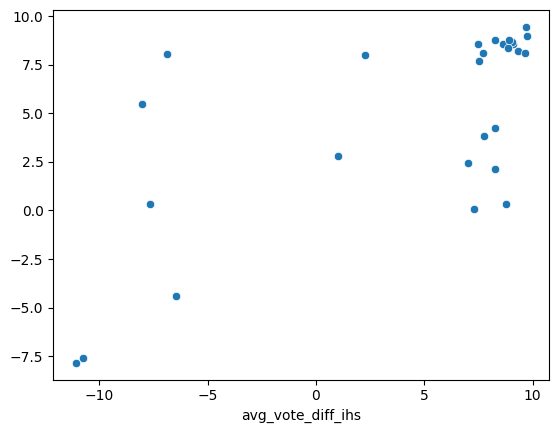

In [ ]:
# Scatterplot of predicted v. actual:
sns.scatterplot(x=y_test, y=y_hat_rf) # Predicted v Actual

In [ ]:
rf.score(X_test,y_test) # Rsq measure

0.447409592378038

In [ ]:
mse = mean_squared_error(y_test, y_hat_rf)
RMSE = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 5.276557296324533


<Axes: xlabel='avg_vote_diff_ihs', ylabel='Density'>

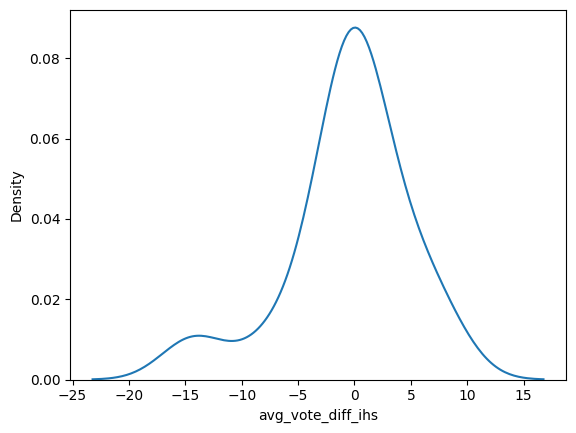

In [ ]:
# Residual plot:
residual = y_test - y_hat_rf
sns.kdeplot(x=residual)

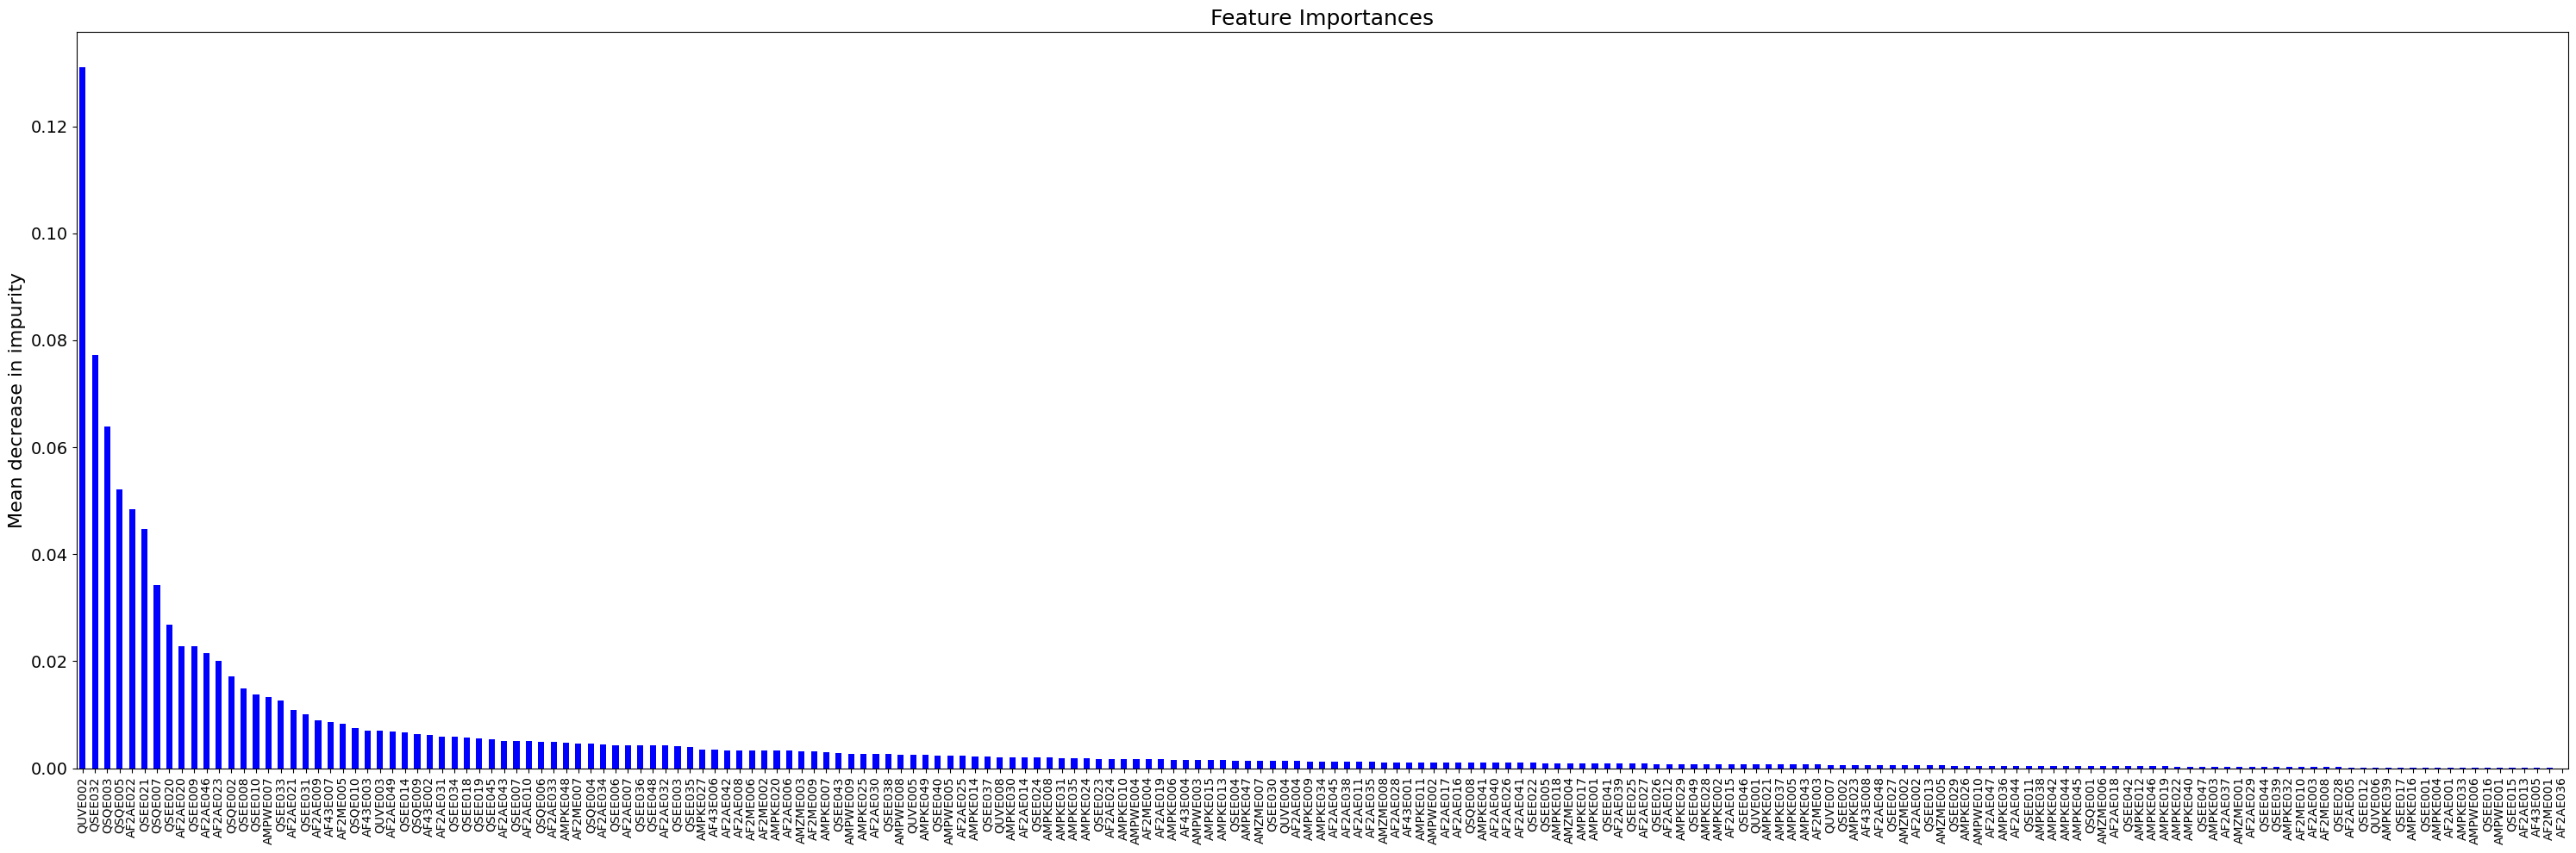

In [ ]:
#feauture importance plot
import matplotlib.pyplot as plt
import pandas as pd

forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
sorted_importances = forest_importances.sort_values(ascending=False)
plt.figure(figsize=(30, 10))

#feature importances with a bar chart
sorted_importances.plot(kind='bar', color='blue')

plt.title('Feature Importances', fontsize=18)
plt.ylabel('Mean decrease in impurity', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=14)

plt.tight_layout()

#export plot
plt.savefig('feature_importances.png', dpi=300)

plt.show()

Merging model back with geography dataframe to visualize model's prediction on virginia.

<Axes: title={'center': "Random Forest Model's Predictor for Avg Vote Difference (IHS)"}>

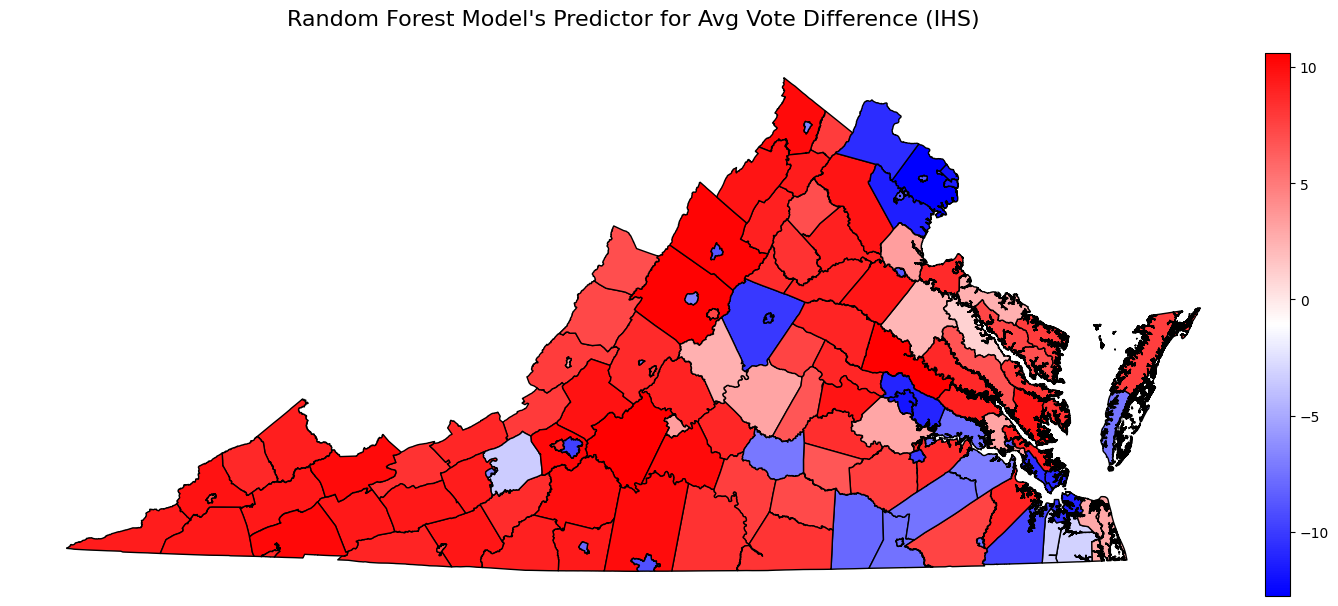

In [ ]:
#DataFrame from predictions and FIPS codes
predictions_df = pd.DataFrame({
    'FIPS': fips_test,  # FIPS codes corresponding to the test set
    'avg_vote_diff_ihs': y_hat_rf  # Predictions from the model
})

# Merge the geographic data with the predictions
result_df = pd.merge(geo_df, predictions_df, on='FIPS', how='left')

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
ax.set_title("Random Forest Model's Predictor for Avg Vote Difference (IHS)", fontsize=16, pad=20)
df.plot(ax=ax,column='avg_vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')


### Model performance:

The Rsquare value of the random forest model is about 0.447, indicating that its prediction accuracy is in the medium range.

### Key Observations from Map:

1. Republican strongholds: Red areas in the map represent predicted Republican strongholds, concentrated in areas that may traditionally lean Republican. This is the vast majority of the map, meaning that Republicans are likely to have a stronger influence or majority support.
2. Democratic strongholds: Blue areas in the map represent predicted Democratic strongholds, concentrated in areas that may traditionally lean Democratic. The map shows that these areas are typically northeast and southeast regions of Virginia.
3. Regional differences: The sharp contrast in color between adjacent counties indicates significant differences in local political preferences, which can be influenced by socioeconomic factors or local issues. These are particuarly noticable in counties that are extremely red but have extremely blue centers, which represent the difference in political opinions between cities (the blue) and rural counties (the red)

### Predictions for Vote Results:

1. Republican dominance: Given the red majority across the discretized map, it is reasonable to predict that Republicans could win the state as a whole. Rural and suburban areas that tend to vote Republican generally cover a larger geographic area and therefore support is higher.
2. Democratic strongholds: While there are fewer blue areas shown, these districts are crucial for Democrats and, depending on their population density, could have a significant impact on the overall outcome, especially in statewide or national elections.
3. Swing districts: The few light red counties and the light blue counties indicate areas where the margins are expected to be very narrow and these counties are likely to be closely contested and could swing either way depending on the specific campaign or the state of the local economy or recent political events.

# Conclusion
From the intuitive performance of the random forest model, the Republican Party has broader geographical support in the described state, but the Democratic Party's support is mainly concentrated in key districts. The swing area is also very imporatant, since it may have great influence on the final voting result. For political parties, it's crucial to maintain current support by considering about people's need and own advantages. Besides, it's necessary to try best to get support from swing areas through targeted political compaigns.

### Strategies for Parties
1. Data-driven:
Using data analytics to constantly refine campaign strategies based on real-time feedback and dynamic changes. Investing in data operations can provide insights into voter sentiment and behavioral changes to enhance.
2. local engagement:
Both parties should strengthen local engagement strategies to build personal connections with voters and better understand their concerns.
3. social media and online activity:
Utilize social media to tailor online content and advertising to the interests and concerns of specific voter groups

### Limitation

1. Model accuracy:
* An R-square score of 0.447, while mid-range, indicates that the model fails to explain more than half of the variance, implying that key variables or interactions may be missing.
* The presence and distribution of residuals indicate a potential problem with model fitting, like the error variance may not be constant.

2. Missing values:
* Due to the discrepancies with the census NHGIS data and the total voting data, we were not able to use data from certain years. The unused data could have changed the model and provided us with different predicaitons.
* non-response bias: for problems about personal prefernece of political party, some people may refuse to answer.

3. Set price of poverty:
* there's a varaiable we use in the model is ratio of income to poverty level. The poverty threshold is setted by government, and we suppose it depends on the annual performance of GDP or something else, which also means it could be changable every year. Based on the economic performance from the beggining of year that many things are keeping increasing prices, it's reasonable to believe the line of poverty level will change, which may reduce credibility of our model.

4. Pooled Data:
* The model produced pulled from a pooled dataset, which could conceal important findings on how political views shift over the years. Creating separate plots for each year could refine predictions and reveal trends related to time.

5. Views/opinons are changable:
* People's views on political party could change based on time or some specific news/events. It increases the difficulty of estimation accuracy.
* Also, there's possibility that people make the different choice in real voting compared to the census.

#### Possible Improvements

1. Model Enhancement:
Incorporating additional variables that capture more detailed aspects of voter behavior and preferences could improve model accuracy. For example, local economic conditions.
2. Data Collection:
Enhancing the dataset with more comprehensive data sources, such as more detailed voter history or applying social media sentiment analysis or macroeconomic data from FRED (https://fred.stlouisfed.org/); it could provide new insights.
3. Data Consistency:
The 2020 voting data was partitioned into types of votes (absentee, provisional, election day). If the other years had this kind of detailed separation it might be possible to see if different ways of voting was a confounding variable that could help with predictions